# Project Question: Based on the observational data, how can we best predict heart disease?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df = pd.read_csv('heart.csv') #reading the heart dataset
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.columns #checking the columns in the dataset

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.describe() #computing the statistical features of the numerical columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.head(20) #checking the first 20 rows of the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [6]:
df.dtypes #checking the datatypes of the data contained in the columns

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
copydata = df

In [8]:
idealOutput = pd.DataFrame()
idealOutput = df.HeartDisease #saving the HeartDisease column in a separate dataframe
df = df.drop("HeartDisease", axis=1) #dropping the column from the main dataframe

In [9]:
copyNoHD = df

In [10]:
c1 = pd.get_dummies(df.Sex, prefix="Sex") #creating indicator data for Sex column

In [11]:
df.ChestPainType.unique() #obtaining unique categories in each of the columns with object data types

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [12]:
c2 = pd.get_dummies(df.ChestPainType,prefix="CPT") #creating indicator data for Chest Pain Type column

In [13]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [14]:
c3 = pd.get_dummies(df.RestingECG,prefix="RECG") #creating indicator data for Resting ECG column

In [15]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [16]:
c4 = pd.get_dummies(df.ExerciseAngina,prefix="EA") #creating indicator data for Excercise Angina column

In [17]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [18]:
c5 = pd.get_dummies(df.ST_Slope,prefix="ST_S") #creating indicator data for ST_Slope column

In [19]:
df = df.join([c1,c2,c3,c4,c5]) #appending the indicator columns to the main data frame

In [20]:
df = df.drop(["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],axis=1) #dropping the columns where the data has been converted to indicator data

In [21]:
df #visualizing the data frame after these changes

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,CPT_ASY,CPT_ATA,CPT_NAP,CPT_TA,RECG_LVH,RECG_Normal,RECG_ST,EA_N,EA_Y,ST_S_Down,ST_S_Flat,ST_S_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [22]:
df["normal_BP"] = 0 #creating arrays for indicator Blood Pressure data in 3 ranges ('normal', 'at risk', and 'high')
df["atRisk_BP"] = 0
df["high_BP"] = 0

In [23]:
for i in range(len(df.index)): #dividing each person into three categories of resting BP
    if (df.RestingBP.iloc[i] <= 120):
        df["normal_BP"].iloc[i] = 1
    elif (df.RestingBP.iloc[i] > 120 and df.RestingBP.iloc[i] <= 139):
        df["atRisk_BP"].iloc[i] =1
    else:
        df["high_BP"].iloc[i] = 1

/Users/adityasyam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,CPT_ASY,CPT_ATA,...,RECG_Normal,RECG_ST,EA_N,EA_Y,ST_S_Down,ST_S_Flat,ST_S_Up,normal_BP,atRisk_BP,high_BP
0,40,140,289,0,172,0.0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,1,1,0,0,0,1,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
914,68,144,193,1,141,3.4,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,1,0,0,1,0,1,0,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [25]:
df["desirable_cholesterol"] = 0 #creating arrays for indicator Cholesterol data in 3 ranges 
df["borderline_cholesterol"] = 0
df["high_cholesterol"] = 0

In [26]:
for i in range(len(df.index)): #dividing each person into three categories of Cholesterol
    if (df.Cholesterol.iloc[i] < 200):
        df["desirable_cholesterol"].iloc[i] = 1
    elif (df.Cholesterol.iloc[i] >= 200 and df.Cholesterol.iloc[i] <= 239):
        df["borderline_cholesterol"].iloc[i] =1
    else:
        df["high_cholesterol"].iloc[i] = 1

/Users/adityasyam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,CPT_ASY,CPT_ATA,...,EA_Y,ST_S_Down,ST_S_Flat,ST_S_Up,normal_BP,atRisk_BP,high_BP,desirable_cholesterol,borderline_cholesterol,high_cholesterol
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0
915,57,130,131,0,115,1.2,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
916,57,130,236,0,174,0.0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [28]:
copydata #checking that the original data has been maintained in a copy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [29]:
copyNoHD #checking original data without heart disease column

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [30]:
copydata.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

VISUALIZATIONS

<AxesSubplot:title={'center':'Histogram of the Age of Heart Patients, with respect to Heart Disease'}, xlabel='Age', ylabel='Frequency'>

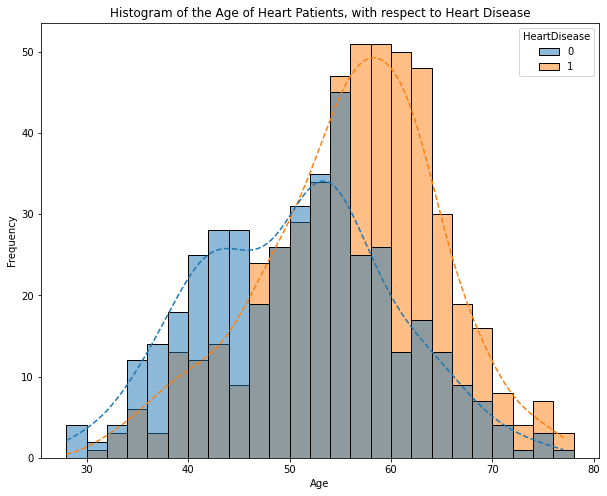

In [31]:
plt.figure(figsize=(10,8))
plt.title('Histogram of the Age of Heart Patients, with respect to Heart Disease')
plt.ylabel('Frequency')
sns.histplot(x='Age', data=copydata, hue='HeartDisease', binwidth=2, kde=True, color='red', line_kws= {'linestyle': 'dashed'})

From the above histograms, it is clear that people in their middles age years, specifically the middle 50% of subjects with heart diseases are between the ages 47 and 60.

Text(3.6750000000000043, 0.5, 'Maximum Heart Rate')

<Figure size 1080x720 with 0 Axes>

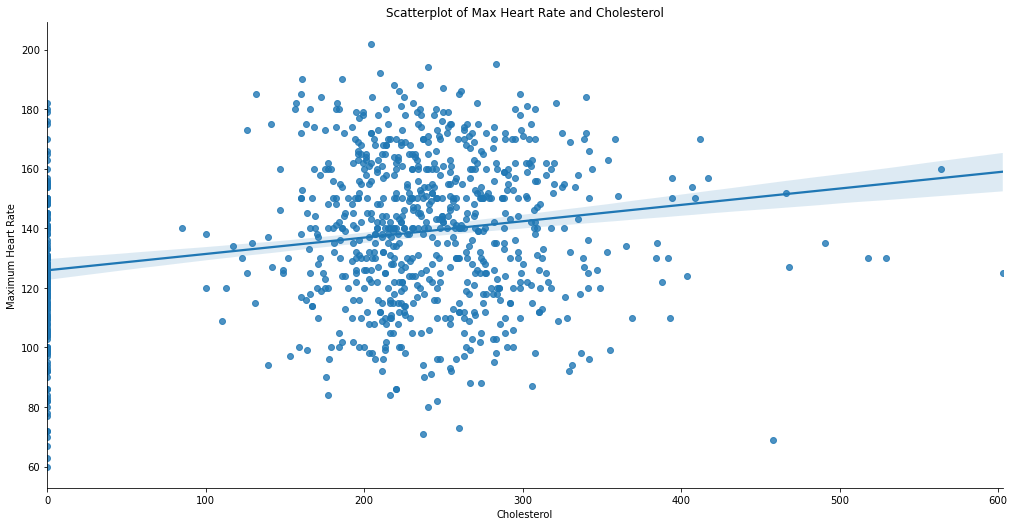

In [32]:
plt.figure(figsize=(15, 10))
sns.lmplot(x='Cholesterol', y='MaxHR', data=copydata, height=7, aspect=2)
plt.title('Scatterplot of Max Heart Rate and Cholesterol')
plt.ylabel('Maximum Heart Rate')

From the above scatter plot, there seems to be a directly proportional relationship between cholesterol and maximum heart rate. This should ideally mean that both these factors would have similar impacts on the probability of heart disease diagnosis.

<AxesSubplot:title={'center':'Relationship between Cholesterol and Heart Disease'}, xlabel='HeartDisease', ylabel='Cholesterol'>

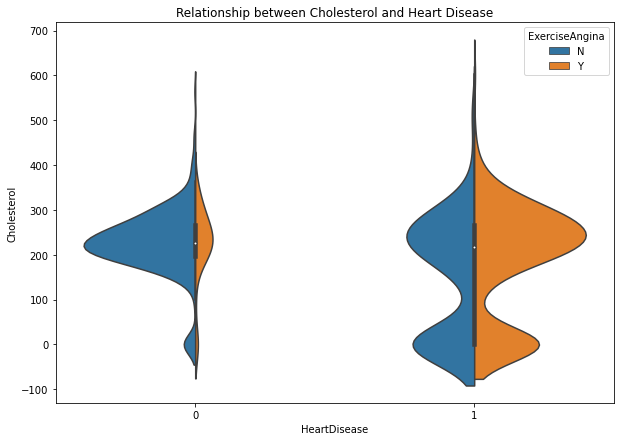

In [33]:
plt.figure(figsize=(10,7))
plt.title('Relationship between Cholesterol and Heart Disease')
plt.ylabel('Cholesterol Level')
sns.violinplot(x='HeartDisease', y='Cholesterol', data=copydata, hue='ExerciseAngina', split=True, scale='count')

The above violin plots correlate Heart Disease and Cholestrol, along with the filteration (hue) of Exercise Angina. Based on the visualisations, we can conclude that most subjects with Heart Disease have exercise angina (chest pain). Thus, this is an important determining factor in heart disease, and can be used as an indciator for diagnosis.

<Figure size 576x360 with 0 Axes>

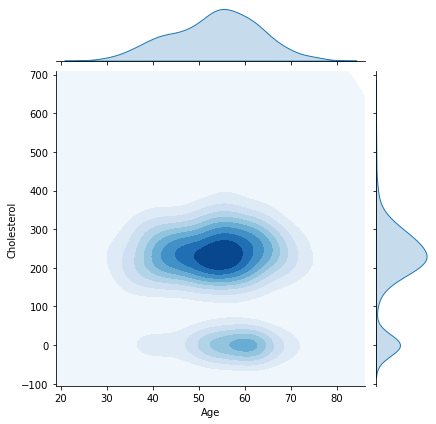

In [34]:
plt.figure(figsize=(8,5))
sns.jointplot(x='Age', y='Cholesterol', data=copydata, kind='kde', fill=True, thresh=0, cmap='Blues')

The 2D density plot above displays the areas of concentration of the humans who participated in the study with respect to their age and cholestrol. The darker the region on the map, the denser the concentration and, therefore, the higher the frequency of subjects of that age having that cholesterol. 
It appears that most people suffering from heart disease in our dataset are between the ages of 50 and 60. Also, from the contour patterns, we see that most of the people have a cholesterol between 220-260. Hence, when predicting heart disease, these values for cholesterol and age can be correlated and used in diagnosis.

Credit: Since 2D Densities were not taught in the class, I was looking for a creative way to display this statistic as well.
This is when I, looking for inspiration, in the discussion section of Kaggle found similar representations in terms
of the skeleton. I then looked for which variables would show the most meaningful correlation and added them to the to the visualisation.

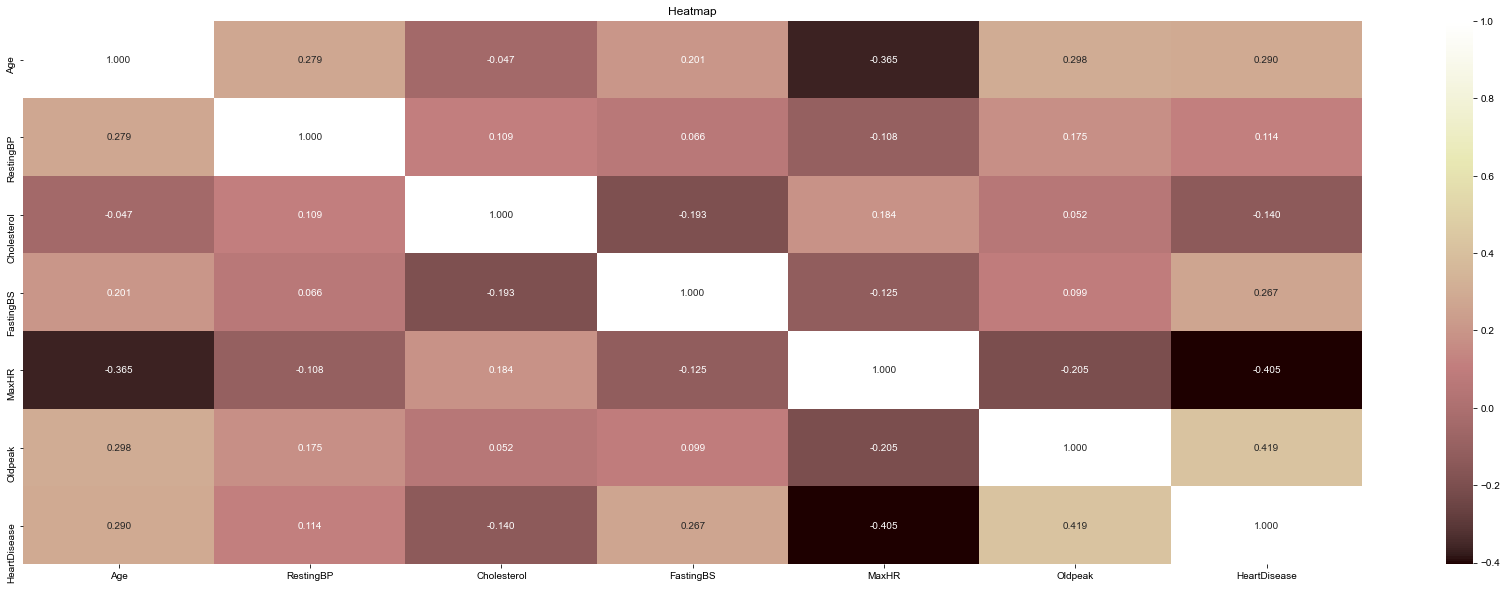

In [35]:
correlation = copydata.corr(method = 'spearman')
plt.figure(figsize=(30,10))
sns.heatmap(correlation, annot=True, fmt='.3f', cmap='pink')
plt.title('Heatmap')
sns.set(font_scale = 1)
plt.show()

This correlation heat map visualises the connection between all the variables in the dataset. What can be seen with each of the variables correlated to each other makes sense, as the value is 1. Where the correlation is positive, we can conclude there is a proportional relationship, and the same for the negative values. Where the colour is lighter, there is a stronger correlation between variables. For instance, Age and Resting BP when correlated have a relatively weaker correlation than Age and Cholesterol. This can be used to predict heart disease better, as this visualisation gives a coherent picture of the relationship between all variables at once.

__________________________________________________________________________________________________________________

MODELS

kNN Classifier model

First, we use a k neighbors classifier model to predict heart disease using continuous data

In [36]:
X = copydata[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'FastingBS']]
Y = idealOutput

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42) 

model = KNeighborsClassifier()

model.fit(x_train, y_train) 

predictions = model.predict(x_test) 

print("sklearn's accuracy score for diagnosis:", accuracy_score(y_test, predictions)) 

sklearn's accuracy score for diagnosis: 0.6884531590413944


In [37]:
accuracy = accuracy_score(y_test, predictions)
print('accuracy:',accuracy)

accuracy: 0.6884531590413944


Next, we check the accuracy scores for different values of k (due to the risk of overfitting)

In [38]:
# Model when k=1
model1 = KNeighborsClassifier(1)
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_test)

# Model when k=10
model10 = KNeighborsClassifier(10)
model10.fit(x_train, y_train)
predictions10 = model10.predict(x_test)

# Model when k=100
model100 = KNeighborsClassifier(100)
model100.fit(x_train, y_train)
predictions100 = model100.predict(x_test)

print("accuracy score when k=1:", accuracy_score(y_test, predictions1))
print("accuracy score when k=10:", accuracy_score(y_test, predictions10))
print("accuracy score when k=100:", accuracy_score(y_test, predictions100))


accuracy score when k=1: 0.6318082788671024
accuracy score when k=10: 0.6993464052287581
accuracy score when k=100: 0.6993464052287581


We also plot the variation in the accuracy with different values of k

In [39]:
accuracy=[]
for i in range(1,51):
    model = KNeighborsClassifier(i)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy.append(accuracy_score(predictions,y_test))

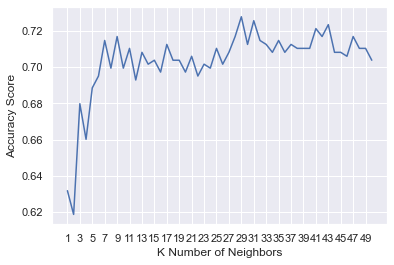

In [40]:
plt.plot(range(1,51),accuracy)
plt.xticks(range(1,51,2),range(1,51,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.show() #plotting the variation of accuracy against number of neighbors

Now, we are trying to create more k neighbors classifier models using discrete data (created using dummy variables) as the input to observe the variation in accuracy with different input factors

The first model uses only sex, chest pain type, resting ECG, and excercise angina

In [41]:
X = df[['Age', 'Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y']]
Y = idealOutput

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42) 

model = KNeighborsClassifier()

model.fit(x_train, y_train) 

predictions = model.predict(x_test) 

print("sklearn's accuracy score for diagnosis:", accuracy_score(y_test, predictions)) 

sklearn's accuracy score for diagnosis: 0.7494553376906318


In [42]:
accuracy = accuracy_score(y_test, predictions)
print('accuracy for first model:',accuracy)

accuracy for first model: 0.7494553376906318


The second model uses only sex, chest pain type, resting ECG, excercise angina, and oldpeak

In [43]:
X = df[['Age', 'Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y', 'ST_S_Down', 'ST_S_Flat', 'ST_S_Up']]
Y = idealOutput

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42) 

model = KNeighborsClassifier()

model.fit(x_train, y_train) 

predictions = model.predict(x_test) 

print("sklearn's accuracy score for diagnosis:", accuracy_score(y_test, predictions)) 

sklearn's accuracy score for diagnosis: 0.8082788671023965


In [44]:
accuracy = accuracy_score(y_test, predictions)
print('accuracy for second model:',accuracy)

accuracy for second model: 0.8082788671023965


The third model uses only sex, chest pain type, resting ECG, excercise angina, oldpeak, and BP

In [45]:
X = df[['Age', 'Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y', 'ST_S_Down', 'ST_S_Flat', 'ST_S_Up', 'normal_BP', 'atRisk_BP', 'high_BP']]
Y = idealOutput

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42) 

model = KNeighborsClassifier()

model.fit(x_train, y_train) 

predictions = model.predict(x_test) 

print("sklearn's accuracy score for diagnosis:", accuracy_score(y_test, predictions))

sklearn's accuracy score for diagnosis: 0.8104575163398693


In [46]:
accuracy = accuracy_score(y_test, predictions)
print('accuracy for third model:',accuracy)

accuracy for third model: 0.8104575163398693


The fourth model uses only sex, chest pain type, resting ECG, excercise angina, oldpeak, BP and cholesterol

In [47]:
X = df[['Age', 'Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y', 'ST_S_Down', 'ST_S_Flat', 'ST_S_Up', 'normal_BP', 'atRisk_BP', 'high_BP', 'desirable_cholesterol', 'borderline_cholesterol', 'high_cholesterol']]
Y = idealOutput

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42) 

model = KNeighborsClassifier()

model.fit(x_train, y_train) 

predictions = model.predict(x_test) 

print("sklearn's accuracy score for diagnosis:", accuracy_score(y_test, predictions))

sklearn's accuracy score for diagnosis: 0.8082788671023965


In [48]:
accuracy = accuracy_score(y_test, predictions)
print('accuracy for fourth model:',accuracy)

accuracy for fourth model: 0.8082788671023965


The last k neighbors model uses only discrete data as input

In [49]:
X = df[['Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y', 'ST_S_Down', 'ST_S_Flat', 'ST_S_Up', 'normal_BP', 'atRisk_BP', 'high_BP', 'desirable_cholesterol', 'borderline_cholesterol', 'high_cholesterol']]
Y = idealOutput

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42) 

model = KNeighborsClassifier()

model.fit(x_train, y_train) 

predictions = model.predict(x_test) 

print("sklearn's accuracy score for diagnosis:", accuracy_score(y_test, predictions))

sklearn's accuracy score for diagnosis: 0.8605664488017429


In [50]:
accuracy = accuracy_score(y_test, predictions)
print('accuracy for last model:',accuracy)

accuracy for last model: 0.8605664488017429


Since the last model has the highest accuracy (using only discrete data as input), we will explore it further

In [51]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred_train = knn.predict(x_train)
knn_pred_test = knn.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, knn_pred_test))

Train Accuracy:  0.8736383442265795
Test Accuracy:  0.8605664488017429


check the accuracy scores for different values of k (due to the risk of overfitting)

In [52]:
# Model when k=1
model1 = KNeighborsClassifier(1)
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_test)

# Model when k=10
model10 = KNeighborsClassifier(10)
model10.fit(x_train, y_train)
predictions10 = model10.predict(x_test)

# Model when k=100
model100 = KNeighborsClassifier(100)
model100.fit(x_train, y_train)
predictions100 = model100.predict(x_test)

print("accuracy score when k=1:", accuracy_score(y_test, predictions1))
print("accuracy score when k=10:", accuracy_score(y_test, predictions10))
print("accuracy score when k=100:", accuracy_score(y_test, predictions100))

accuracy score when k=1: 0.7908496732026143
accuracy score when k=10: 0.8649237472766884
accuracy score when k=100: 0.8583877995642701


In [53]:
accuracy=[]
for k in range(1,51):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy.append(accuracy_score(predictions,y_test))

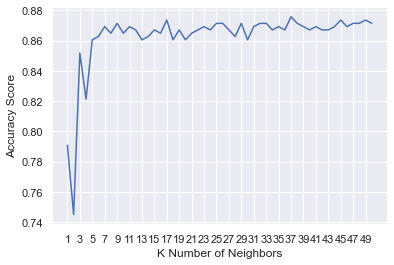

In [54]:
plt.plot(range(1,51),accuracy)
plt.xticks(range(1,51,2),range(1,51,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.show() #plotting the variation of accuracy against number of neighbors

Based on the kNN models above, it seems evident that the accuracy of kNN classifiers seems highest with discrete inputs. Further, the accuracy of the classifier increases as we increase the number of input variables, so the entire observational dataset seems relevant to the prediction of heart disease. 

Also, due to the risk of overfitting, there is not a direct proportionality between the value of k and the accuracy, as seen in the plot above.

_______________________________________________________________________________________________________

Decision tree classifier model

Now, we will use a Decision tree classifier model, first using only discrete data as input

In [55]:
X = df[['Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y', 'ST_S_Down', 'ST_S_Flat', 'ST_S_Up', 'normal_BP', 'atRisk_BP', 'high_BP', 'desirable_cholesterol', 'borderline_cholesterol', 'high_cholesterol']]
Y = idealOutput

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

model=tree.DecisionTreeClassifier(max_depth=5)

model.fit(X_train,Y_train)

dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

Train Accuracy:  0.8627450980392157
Test Accuracy:  0.8583877995642701


Now we will test the performance with different max depth values (due to the risk of overfitting)

In [56]:
incX = X
incY = Y

incX_train, incX_test, incY_train, incY_test = train_test_split(incX, incY, test_size = 0.5)

best_depth = 1 #Keep track of depth that produces tree with highest accuracy
best_accuracy = 0 #The best accuracy from a given tree
for k in range(1,100):
    
    model=tree.DecisionTreeClassifier(max_depth=k)
    
    model.fit(incX_train, incY_train)
    pred_test = model.predict(incX_test)
    acc_test = accuracy_score(incY_test, pred_test)
    
    if acc_test > best_accuracy:
        best_accuracy = acc_test
        best_depth = k
        
print("the best accuracy is:", best_accuracy)
print("the best depth is: ", best_depth)

the best accuracy is: 0.8278867102396514
the best depth is:  7


Now, we will use Decision tree classifiers with the original continous data 

In [57]:
X = copydata[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'FastingBS']]
Y = idealOutput

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

model=tree.DecisionTreeClassifier(max_depth=5)

model.fit(X_train,Y_train)

dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

Train Accuracy:  0.8148148148148148
Test Accuracy:  0.6862745098039216


Testing the performance with different max depth values 

In [58]:
incX = X
incY = Y

incX_train, incX_test, incY_train, incY_test = train_test_split(incX, incY, test_size = 0.5)

best_depth = 1 #Keep track of depth that produces tree with highest accuracy
best_accuracy = 0 #The best accuracy from a given tree
for k in range(1,100):
    
    model=tree.DecisionTreeClassifier(max_depth=k)
    
    model.fit(incX_train, incY_train)
    pred_test = model.predict(incX_test)
    acc_test = accuracy_score(incY_test, pred_test)
    
    if acc_test > best_accuracy:
        best_accuracy = acc_test
        best_depth = k
        
print("the best accuracy is:", best_accuracy)
print("the best depth is: ", best_depth)

the best accuracy is: 0.6949891067538126
the best depth is:  5


The accuracy seems to have gone down after using continous instead of the discrete data obtained by creating dummy variables

Now we will try out a few different Decision tree classifier model inputs, just as was done with the K neighbors model, and see how our accuracy of diagnosing heart disease changes

The first model uses only sex, chest pain type, resting ECG, and excercise angina

In [59]:
X = df[['Age', 'Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y']]
Y = idealOutput

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

model=tree.DecisionTreeClassifier(max_depth=5)

model.fit(X_train,Y_train)

dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

Train Accuracy:  0.8344226579520697
Test Accuracy:  0.7625272331154684


The second model uses only sex, chest pain type, resting ECG, excercise angina, and oldpeak

In [60]:
X = df[['Age', 'Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y', 'ST_S_Down', 'ST_S_Flat', 'ST_S_Up']]
Y = idealOutput

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

model=tree.DecisionTreeClassifier(max_depth=5)

model.fit(X_train,Y_train)

dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

Train Accuracy:  0.8736383442265795
Test Accuracy:  0.8235294117647058


The third model uses only sex, chest pain type, resting ECG, excercise angina, oldpeak, and BP

In [61]:
X = df[['Age', 'Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y', 'ST_S_Down', 'ST_S_Flat', 'ST_S_Up', 'normal_BP', 'atRisk_BP', 'high_BP']]
Y = idealOutput

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

model=tree.DecisionTreeClassifier(max_depth=5)

model.fit(X_train,Y_train)

dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

Train Accuracy:  0.8736383442265795
Test Accuracy:  0.8300653594771242


The fourth model uses sex, chest pain type, resting ECG, excercise angina, oldpeak, BP and cholesterol

In [62]:
X = df[['Age', 'Sex_F', 'Sex_M', 'CPT_ASY', 'CPT_ATA', 'CPT_NAP', 'CPT_TA', 'RECG_LVH', 'RECG_Normal', 'RECG_ST', 'EA_N', 'EA_Y', 'ST_S_Down', 'ST_S_Flat', 'ST_S_Up', 'normal_BP', 'atRisk_BP', 'high_BP', 'desirable_cholesterol', 'borderline_cholesterol', 'high_cholesterol']]
Y = idealOutput

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

model=tree.DecisionTreeClassifier(max_depth=5)

model.fit(X_train,Y_train)

dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

Train Accuracy:  0.8758169934640523
Test Accuracy:  0.8191721132897604


Based on the Decision tree classifier, it is evident that the classifier has a higher accuracy with discrete data as input, as compared to using the original continous data. Further, similar to the pattern in accuracy fluctuation of the kNN classifier, the accuracy rate of the Decision tree increases with the addition of more input variables, so the data set seems to be a viable basis for predicting the existence of heart disease.

_________________________________________________

CONCLUSION: Based on our visualisations and our machine learning models — KNN Classifier and Decision Tree Model — we can conclude that certain factors contribute heavily to predicting heart Disease.

As explained before, the correlation heat map based on the opacity of colours highlights connections such as Age and Maximum Heart Rate being good markers for predictions. Another handy visualisation is the Age and Frequency Histogram filtered based on heart disease. This helps to deduce that most subjects with heart disease are in there middle to late years. Hence, the visualisations provide a unique and easy-to-decipher means of supporting  models for heart disease.

The meat of the project, however, are the machine learning models which based on the input factors accurately predict heart disease in subjects. We used two distinct models: 1) KNN Classifiers and 2) Decision Tree Classifier. Both of these models give high accuracy scores, and indicate that the models were a success.

On the whole, the synergy between the visualisations and the models gives a thorough medium to predict heart disease.